<a href="https://colab.research.google.com/github/noctxrne/ICT-Notes/blob/main/15_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tip_amount=pd.read_excel("/content/tip-amount.xlsx")

In [ ]:
tip_amount

,Meal,Observed total bill(xi),Observed tip amount(yi)
0,1,34,5
1,2,108,17
2,3,64,11
3,4,88,8
4,5,99,14
5,6,51,5


<Axes: >

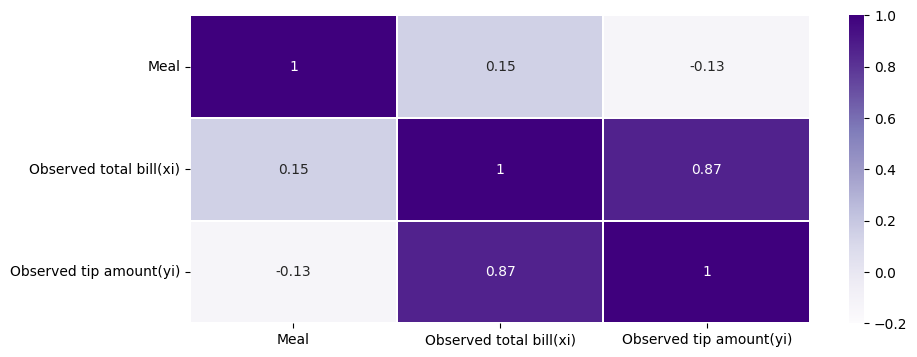

In [ ]:
corr_matrix=tip_amount.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corr_matrix,vmin=-.2,vmax=1,annot=True,linewidths=0.2,cmap='Purples')

In [ ]:
y=tip_amount['Observed tip amount(yi)']
x=tip_amount.drop(['Observed tip amount(yi)'],axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)


In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)

In [ ]:
predictions=model.predict(x_test)

In [ ]:
x_test

,Meal,Observed total bill(xi)
0,1,34
1,2,108


In [ ]:
new_data_point=pd.DataFrame({'Meal':[4,7],'Observed total bill(xi)':[99,150]})
predicted_tip_amount=model.predict(new_data_point)

predicted_tip_amount

from sklearn.metrics import mean_squared_error
print('MSE is :\n',mean_squared_error(y_test,predictions))

MSE is :
 4.892160668179483


In [ ]:
from sklearn.metrics import r2_score
print('R squared value is: \n', r2_score(y_test, predictions))

R squared value is: 
 0.8641066481061255


In [ ]:
from sklearn.datasets import fetch_california_housing

#Load the dataset
data =fetch_california_housing(as_frame=True)
data



{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [ ]:
df=pd.concat([data.data,data.target],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


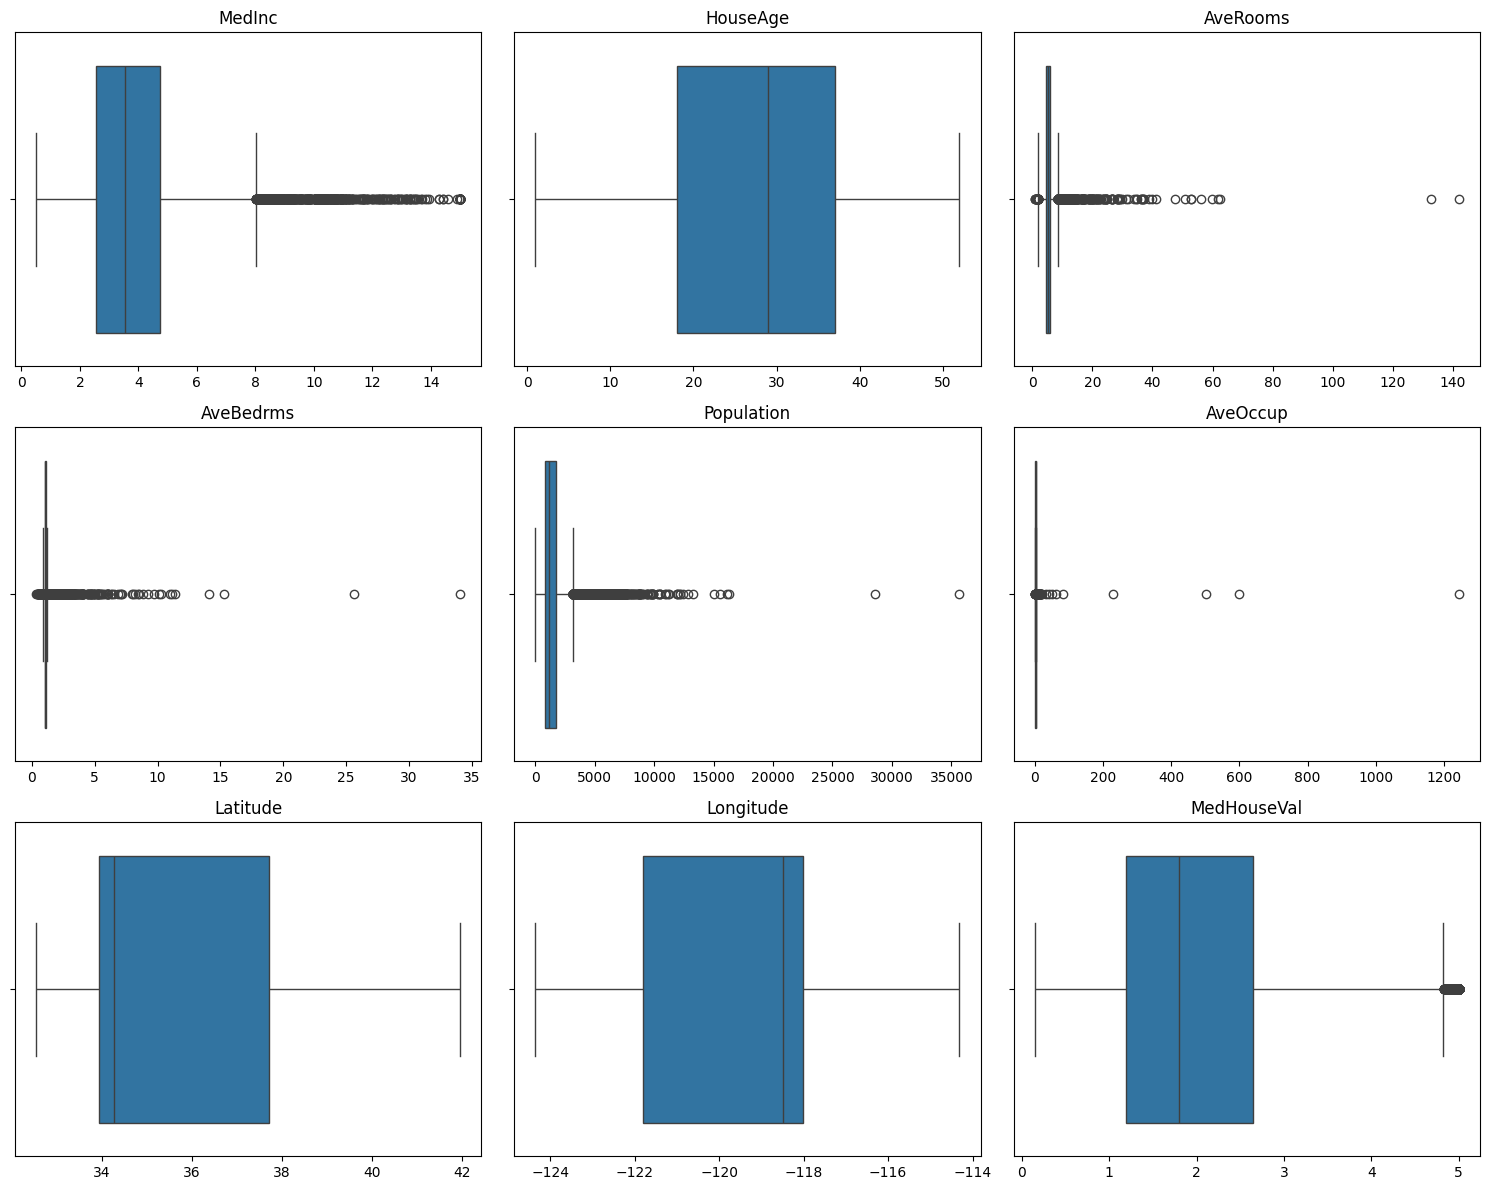

In [ ]:
cols = df.columns.tolist()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

## **Finding Skewness**

In [ ]:
# 2 rows x 3 cols subplot grid (perfect for 6 columns)
fig, axes = plt.subplots(3, 3, figsize=(8, 5))
axes = axes.flatten()

for i, col in enumerate(cols):
    df[col].hist(bins=50, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

In [ ]:
#handing ones that are skewed
skewed_features = ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']
for col in skewed_features:
    df[col] = np.log1p(df[col])  # log1p handles zeros safely

## **Clipping Outliers**

In [ ]:
# Clipping Outliers

# q1=np.quantile(df['MedInc'],0.25)
# q3=np.quantile(df['MedInc'],0.75)
# iqr=q3-q1
# upper_bound=q3+(1.5*iqr)
# lower_bound=q1-(1.5*iqr)

# df['MedInc']=df['MedInc'].clip(lower=lower_bound,upper=upper_bound)

# ####################################################################

# q1=np.quantile(df['AveRooms'],0.25)
# q3=np.quantile(df['AveRooms'],0.75)
# iqr=q3-q1
# upper_bound=q3+(1.5*iqr)
# lower_bound=q1-(1.5*iqr)

# df['AveRooms']=df['AveRooms'].clip(lower=lower_bound,upper=upper_bound)

# ##########################################################################

# q1=np.quantile(df['AveBedrms'],0.25)
# q3=np.quantile(df['AveBedrms'],0.75)
# iqr=q3-q1
# upper_bound=q3+(1.5*iqr)
# lower_bound=q1-(1.5*iqr)

# df['AveBedrms']=df['AveBedrms'].clip(lower=lower_bound,upper=upper_bound)

# ##########################################################################

# q1=np.quantile(df['Population'],0.25)
# q3=np.quantile(df['Population'],0.75)
# iqr=q3-q1
# upper_bound=q3+(1.5*iqr)
# lower_bound=q1-(1.5*iqr)

# df['Population']=df['Population'].clip(lower=lower_bound,upper=upper_bound)

# ####################################################################################

# q1=np.quantile(df['AveOccup'],0.25)
# q3=np.quantile(df['AveOccup'],0.75)
# iqr=q3-q1
# upper_bound=q3+(1.5*iqr)
# lower_bound=q1-(1.5*iqr)

# df['AveOccup']=df['AveOccup'].clip(lower=lower_bound,upper=upper_bound)


## **Winsorizing Outliers**

In [ ]:
from scipy.stats.mstats import winsorize

cols_to_winsor = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

for col in cols_to_winsor:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])  # caps bottom 1% and top 1%

## **Train Test Split**

In [ ]:
y = df['MedHouseVal']
x = df.drop('MedHouseVal',axis=1)

In [ ]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [ ]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,2.077455,0.704982,5.777652,1.268511,37.88,-122.23
1,8.3014,21.0,1.979364,0.678988,7.784057,1.134572,37.86,-122.22
2,7.2574,52.0,2.228738,0.729212,6.208590,1.335596,37.85,-122.24
3,5.6431,52.0,1.919471,0.729025,6.326149,1.266369,37.85,-122.25
4,3.8462,52.0,1.985385,0.732888,6.338594,1.157342,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,1.799307,0.757686,6.740519,1.269931,39.48,-121.09
20636,2.5568,18.0,1.962070,0.839751,5.877736,1.416534,39.49,-121.21
20637,1.7000,17.0,1.825443,0.751460,6.915723,1.201661,39.43,-121.22
20638,1.8672,18.0,1.845223,0.775611,6.609349,1.138861,39.43,-121.32


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=.25)

In [ ]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
8158,4.2143,37.0,1.838680,0.679824,6.758095,1.261131,33.81,-118.12
18368,5.3468,42.0,1.996647,0.736178,6.864848,1.225105,37.16,-121.98
19197,3.9191,36.0,1.961511,0.722584,6.568078,1.174291,38.45,-122.69
3746,6.3703,32.0,1.945910,0.688233,7.056175,1.185569,34.16,-118.41
13073,2.3684,17.0,1.757144,0.710743,6.561031,1.127769,38.57,-121.33
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,1.964175,0.655584,6.490724,1.394327,33.78,-117.96
11964,3.0500,33.0,2.062880,0.819554,7.469654,1.590098,34.02,-117.43
5390,2.9344,36.0,1.606778,0.732222,7.471363,1.466045,34.03,-118.38
860,5.7192,15.0,2.000851,0.726572,7.483244,1.430046,37.58,-121.96


In [ ]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,1.647158,0.704228,7.239215,1.584620,36.06,-119.01
3024,2.5313,30.0,1.798302,0.785495,7.356280,1.302857,35.14,-119.46
15663,3.4801,52.0,1.604858,0.782017,7.178545,0.930827,37.80,-122.44
20484,5.7376,17.0,1.969018,0.703198,7.441907,1.491655,34.28,-118.72
9814,3.7250,34.0,1.870723,0.707069,6.969791,1.248079,36.62,-121.93
...,...,...,...,...,...,...,...,...
5363,6.6260,51.0,1.876746,0.680462,6.648985,1.150466,34.04,-118.42
19755,2.1898,30.0,1.706400,0.665496,6.018593,1.248425,40.18,-122.21
4885,2.1667,37.0,1.452118,0.721230,7.684324,1.719975,34.02,-118.26
13043,6.8869,6.0,2.126132,0.708073,7.764296,1.260863,38.51,-121.06


In [ ]:
y_train

,MedHouseVal
8158,2.285
18368,2.799
19197,1.830
3746,4.658
13073,1.500
...,...
11284,2.292
11964,0.978
5390,2.221
860,2.835


In [ ]:
y_test

,MedHouseVal
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
5363,5.00001
19755,0.63200
4885,1.17700
13043,2.63100


## **Model Fitting**

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

model =lr.fit(x_train,y_train)
predictions =model.predict(x_test)

In [ ]:
x_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,1.647158,0.704228,7.239215,1.584620,36.06,-119.01
3024,2.5313,30.0,1.798302,0.785495,7.356280,1.302857,35.14,-119.46
15663,3.4801,52.0,1.604858,0.782017,7.178545,0.930827,37.80,-122.44
20484,5.7376,17.0,1.969018,0.703198,7.441907,1.491655,34.28,-118.72
9814,3.7250,34.0,1.870723,0.707069,6.969791,1.248079,36.62,-121.93
...,...,...,...,...,...,...,...,...
5363,6.6260,51.0,1.876746,0.680462,6.648985,1.150466,34.04,-118.42
19755,2.1898,30.0,1.706400,0.665496,6.018593,1.248425,40.18,-122.21
4885,2.1667,37.0,1.452118,0.721230,7.684324,1.719975,34.02,-118.26
13043,6.8869,6.0,2.126132,0.708073,7.764296,1.260863,38.51,-121.06


In [ ]:
predictions

array([0.32568253, 1.85828322, 3.43404473, ..., 1.28162692, 2.56480742,
       3.76609183])

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE is :\n' , mean_squared_error(y_test,predictions))

MSE is :
 0.4282090631806011


In [ ]:
from sklearn.metrics import r2_score
print('R squared value is \n',r2_score(y_test,predictions))

R squared value is 
 0.6763881467532387
